In [ ]:
WEEK-7 Assignment-Question-Pandas-2

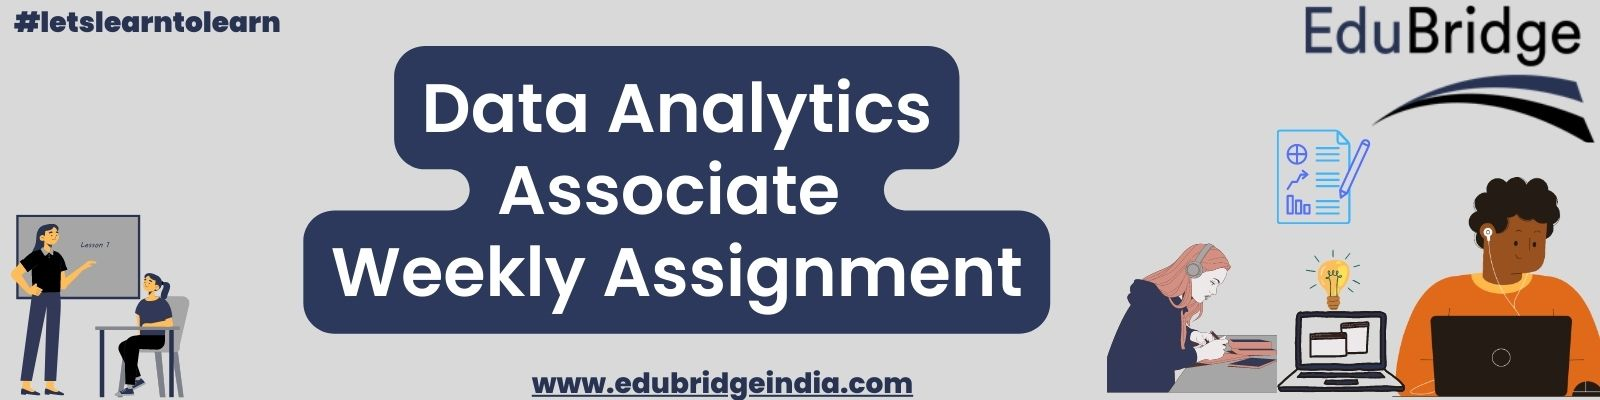

1. Import necessary libraries for sales Data Analysis

In [2]:
import pandas as pd
import numpy as np
import os

2.Concatenate each month sale Data (https://github.com/svkarthik86/Assignment/tree/main/Sales_Data) into one dataframe and save the dataframe to annual_sale.csv

In [ ]:
# hint: 
# step1:download the Sale_date folder contain 12 month file from github link to local current woring directory
# setp2: import os module , use os.listdir() get all file 
#step3: create empty DataFrame as annual_sale
#step4: using for loop to read file locotain contain file and use pd.concat(ignore_index=True) function to concatenate all the file into one dataFrame
# as annual_sale
# at last store DataFrame annual_sale to annual_sale.csv  
#annual_sale.to_csv("annual_sale.csv", index=False)

In [3]:
files=[i for i in os.listdir("Assignment/Sales_data") if i.endswith(".csv")]
annual_sale=pd.concat([pd.read_csv(f"Assignment/Sales_data/{i}") for i in files],ignore_index=True)
annual_sale.to_csv("annual_sale.csv",index=False)

In [ ]:
3.Read the annual_sale.csv fom current working directory and store it as annual_sale dataframe , and display the first five row of the dataframe

In [4]:
annual_sale=pd.read_csv("annual_sale.csv")
annual_sale.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
4.show the metadata information of the annual_sale data frame and check if data is missing or not, if yes How many data are missing.

In [5]:
print(annual_sale.info())
annual_sale.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


3270

# 5.Clean up the data!

5.1 Verify all the column names are in a valid format, if any space between the column name then rename the column names
example: Product ID as Product_ID

In [18]:
annual_sale.columns=[i.replace(' ','_')for i in annual_sale.columns]

In [19]:
annual_sale.columns


Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

5.2 check the isnan is present in dataframe, if there is nan is present remove the nan using dropna() function

In [8]:
annual_sale.isna().sum().sum()
annual_sale.dropna(inplace=True)

In [9]:
annual_sale.isna().sum().sum()

0

5.3 Find The duplicated data present in the data frame, and remove the duplicated data from the dataframe


In [10]:
annual_sale.duplicated().sum()

618

In [78]:
annual_sale[annual_sale.duplicated()]
annual_sale=annual_sale[~(annual_sale['Price_Each']=='Price Each')]
annual_sale=annual_sale[~(annual_sale['Quantity_Ordered']=='Quantity Ordered')]
annual_sale

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


6.memory_usage
check memory_usage of Product column , type cast the Product column as "category" type and then check memmory_usage compare the memory utialization and how much percentage effectively reduce the storage space?

In [79]:
annual_sale.Product.memory_usage()

1671890

In [80]:
annual_sale.Product=annual_sale.Product.astype("category")
annual_sale.Product.memory_usage()

1671890

7.Create and add a new column
Add month column to annual_sale DataFrame object from 'Order Date' column using Series.str method
annual_sale["month"]

In [81]:
annual_sale['month']=annual_sale.Order_Date.str[:2]
annual_sale.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


7.1 converts the datatype of month column as int using astype('int32')

In [82]:
annual_sale.month=annual_sale.month.astype('int32')

In [83]:
annual_sale.month.dtypes

dtype('int32')

7.2 Add sale column to annual_sale DataFrame object using following calculation

sales = Quantity_Ordered * Price_Each

In [84]:
annual_sale['sale']=annual_sale.Quantity_Ordered.astype(float)*annual_sale.Price_Each.astype(float)

In [65]:
annual_sale

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


8. Find out the day,in which sales is high? using gruop by agg function

In [85]:
annual_sale.groupby(annual_sale.Order_Date.str[:8])["sale"].sum().sort_values(ascending=False)[:1]

Order_Date
12/04/19    166577.69
Name: sale, dtype: float64

9. What Product is most frequently purchased over the all period?

In [86]:
annual_sale.Product.value_counts()[:1]

USB-C Charging Cable    21859
Name: Product, dtype: int64

10. List out the Product price above 200$

In [87]:

annual_sale.loc[annual_sale['Price_Each'].astype(float)>200].iloc[:,[1,3]]



,Product,Price_Each
3,Google Phone,600
9,Macbook Pro Laptop,1700
11,Google Phone,600
13,27in 4K Gaming Monitor,389.99
18,Google Phone,600
...,...,...
186836,ThinkPad Laptop,999.99
186841,Google Phone,600
186846,iPhone,700
186847,iPhone,700
